### Distribution of Maps Across Different Countries:

The code calculates the number of maps available for each country in the dataset using the value_counts() function.
It then visualizes this distribution using a bar chart, where each bar represents a country, and the height of the bar indicates the number of maps in that country.


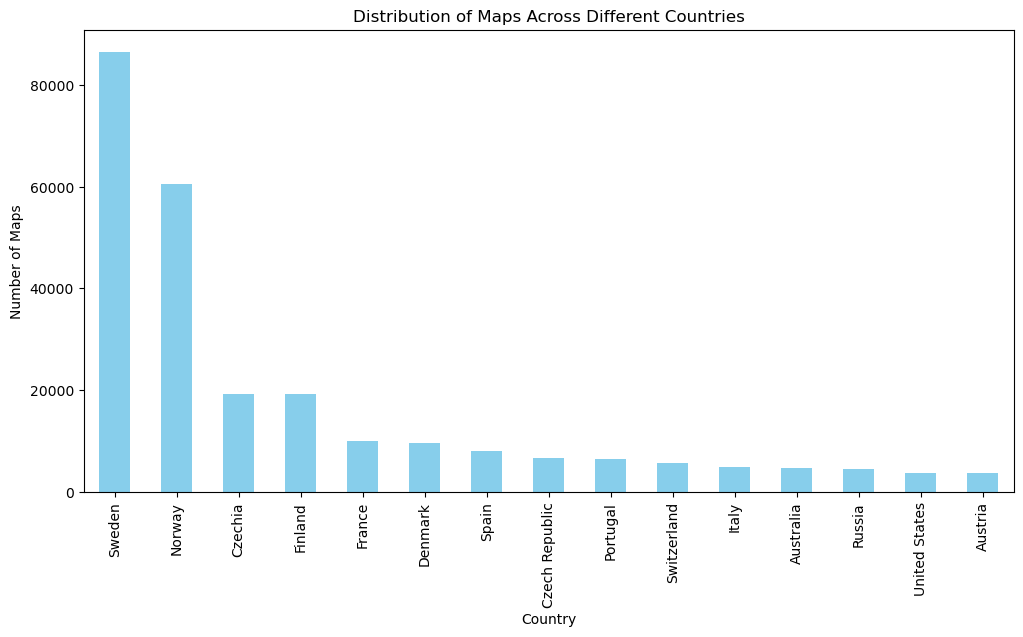

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

df = pd.read_csv(r"C:\Users\pavel\PycharmProjects\osite\WORLDOFO_MAPS.csv")

# Drop rows with missing country values for accurate analysis
df = df.dropna(subset=['country'])
most_popular_countries = list(df['country'].value_counts().index[:10])
# Distribution of maps across different countries
country_counts = df['country'].value_counts()[:15]

# Plot the distribution of maps across different countries
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Maps Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Maps')
plt.show()


### Concentration of Maps Based on Latitude and Longitude:

The code uses a scatter plot to visualize the concentration of maps in specific regions based on latitude and longitude.
Each point in the scatter plot represents a map, and the x and y coordinates correspond to the longitude and latitude, respectively.
This visualization helps identify clusters or patterns in the geographical distribution of maps.

C:\Users\pavel\AppData\Local\Temp\ipykernel_3356\2353614941.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


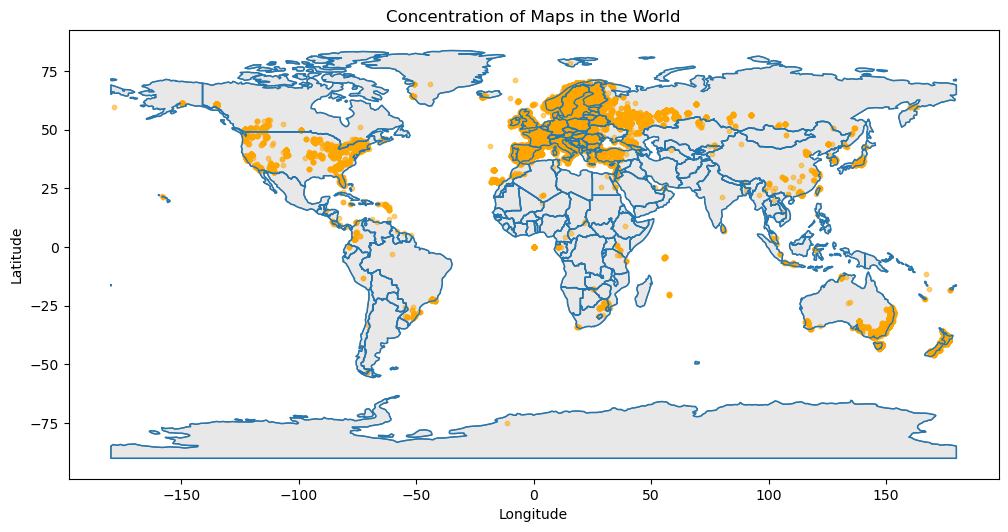

In [12]:

# Download the Natural Earth dataset from the website
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert latitude and longitude to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plot world map with continents
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# Plot the concentration of maps based on latitude and longitude
geo_df.plot(ax=ax, marker='o', color='orange', markersize=10, alpha=0.5)

plt.title('Concentration of Maps in the World')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Mean popularity in 10 most popular countries
The visualization provides a quick overview of the distribution of map popularity across the specified countries, offering insights into the variations in user preferences for maps in the dataset. This analysis helps in understanding the trends and patterns in map popularity


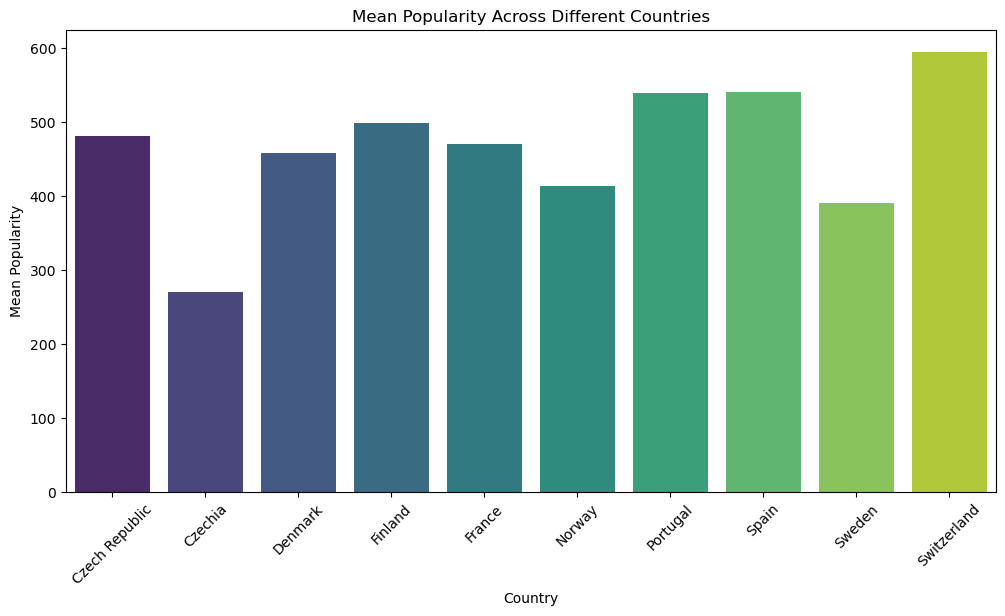

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the mean popularity for each country
mean_popularity_by_country = df[df['country'].isin(most_popular_countries)].groupby('country')['popularity'].mean().reset_index()

# Plot the mean popularity for each country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='popularity', data=mean_popularity_by_country, palette='viridis')
plt.title('Mean Popularity Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=45)
plt.show()


### Correlation Matrix for Map Features:

The code calculates the correlation matrix for all numerical features in the dataset, including popularity.
It then visualizes the correlation matrix using a heatmap.
The heatmap provides a quick overview of the correlation between popularity and other features. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

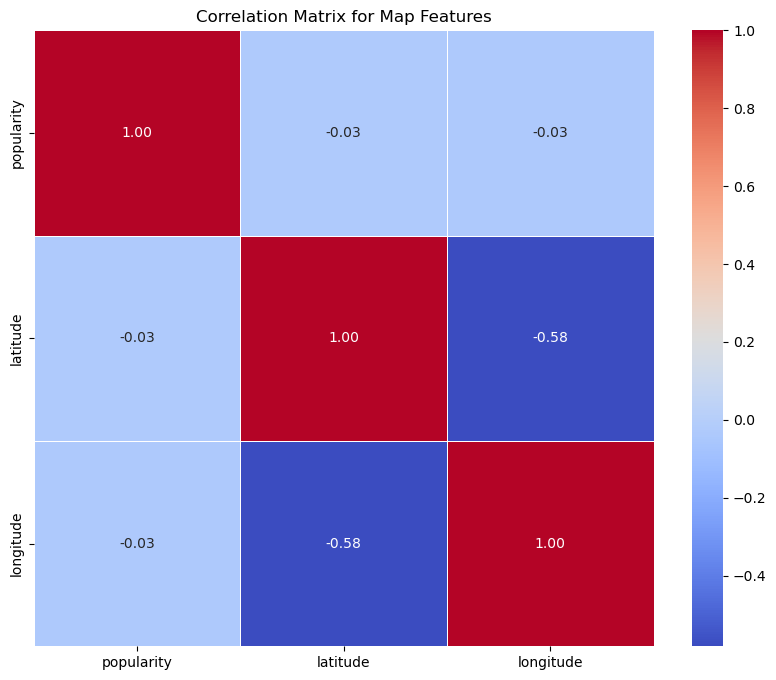

In [14]:

# Select relevant columns
columns_of_interest = ['popularity', 'latitude', 'longitude']
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Map Features')
plt.show()

### Distribution of Maps Across Different Collections:
The code calculates the number of maps available for each collection in the dataset using the value_counts() function.
It then visualizes this distribution using a bar chart, where each bar represents a collection, and the height of the bar indicates the number of maps in that collection.
The top 15 collections are shown for better visibility. This plot shows us most popular ways for collect maps

<Figure size 1200x600 with 0 Axes>

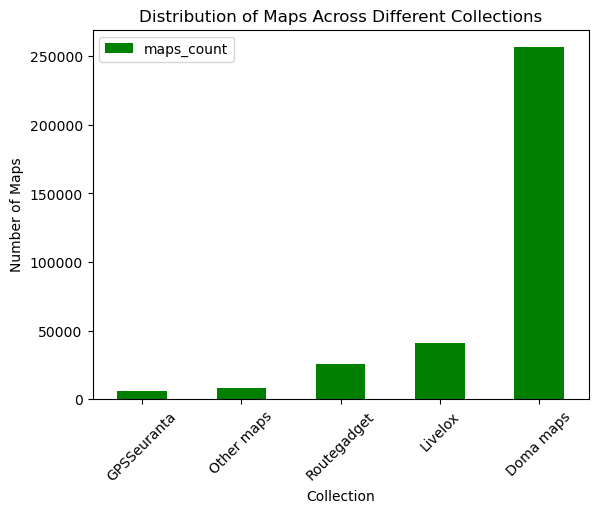

In [15]:
df2 = pd.read_csv(r"C:\Users\pavel\PycharmProjects\osite\WORDOFO_collections.csv").set_index('collection')



plt.figure(figsize=(12, 6))
df2.sort_values(by='maps_count')[-5:].plot(kind='bar', color='green')

# .plot(kind='bar', color='green')
plt.title('Distribution of Maps Across Different Collections')
plt.xlabel('Collection')
plt.ylabel('Number of Maps')
plt.xticks(rotation=45)
plt.show()

### Basic Statistics for Numerical Columns:

The code uses the describe() function to compute basic statistics (mean, standard deviation, min, 25th percentile, median, 75th percentile, and max) for numerical columns in the dataset.
The computed statistics are then displayed, providing insights into the central tendency and spread of numerical features, such as popularity, latitude, and longitude.

In [16]:
numerical_stats = df.describe()

# Display the computed statistics
print("Basic Statistics for Numerical Columns:")
print(numerical_stats)

Basic Statistics for Numerical Columns:
          popularity       latitude      longitude
count  289429.000000  289429.000000  289429.000000
mean      435.262952      52.161478      15.976280
std       540.200391      17.163927      27.333605
min         2.000000     -74.749857    -178.883318
25%       166.000000      49.345734      10.312798
50%       348.000000      58.089765      14.122453
75%       547.000000      59.824344      17.853722
max     31749.000000      78.217799     177.487608


### Check for Outliers or Anomalies:

The code generates a boxplot for the 'popularity' column to visualize the distribution and identify potential outliers.
Outliers in the boxplot are data points that fall outside the whiskers, providing a quick visual check for any anomalies in map popularity.

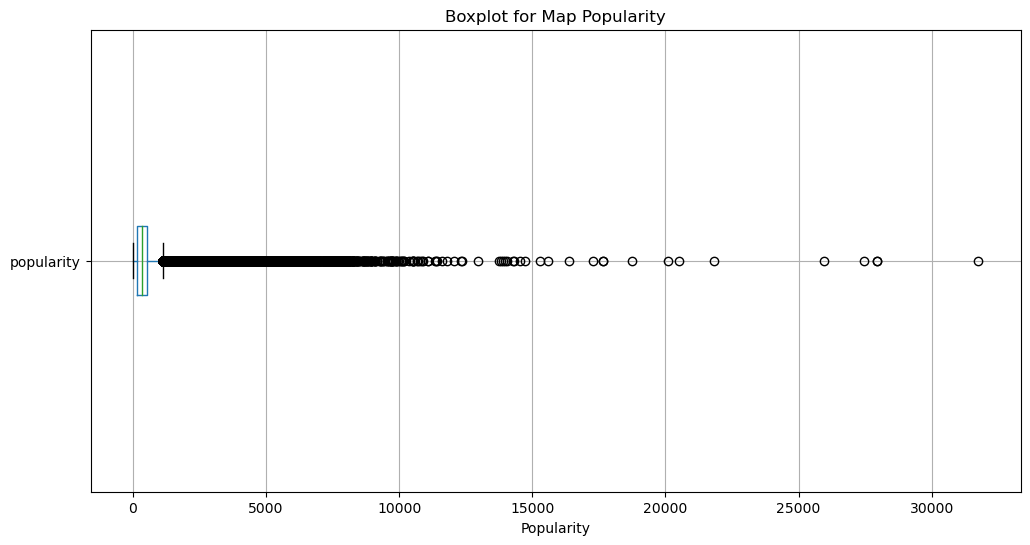

In [17]:
# Check for outliers or anomalies in the data
plt.figure(figsize=(12, 6))
df.boxplot(column='popularity', vert=False)
plt.title('Boxplot for Map Popularity')
plt.xlabel('Popularity')
plt.show()


### Correlation Matrix: Map Count and Population

This heatmap illustrates the correlation matrix between the map count ('popularity') and the population of countries in the dataset. The matrix displays correlation coefficients, ranging from -1 to 1, representing the strength and direction of linear relationships between the two variables.

                count  population
country                          
United States    3616   331002651
Russia           4576   146599183
France          10014    67081000
Italy            4845    60317116
Spain            8013    47671000
Australia        4786    25850630
Czechia         19269    10708981
Czech Republic   6606    10708981
Sweden          86544    10446654
Portugal         6397    10295000
Austria          3612     8902600
Switzerland      5661     8654622
Denmark          9677     5836081
Finland         19177     5539453
Norway          60483     5467439


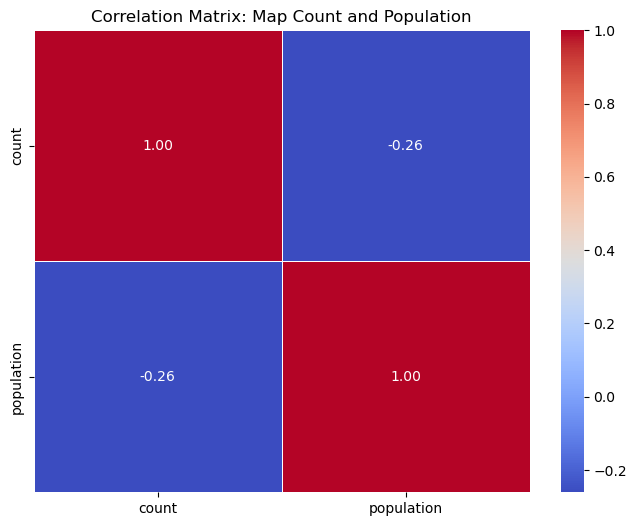

In [28]:
import pandas as pd
population_data = {
    'Sweden': 10446654,
    'Norway': 5467439,
    'Czechia': 10708981,
    'Finland': 5539453,
    'France': 67081000,
    'Denmark': 5836081,
    'Spain': 47671000,
    'Czech Republic': 10708981,
    'Portugal': 10295000,
    'Switzerland': 8654622,
    'Italy': 60317116,
    'Australia': 25850630,
    'Russia': 146599183,
    'United States': 331002651,
    'Austria': 8902600
}

# Create a DataFrame from the population data
population_df = pd.DataFrame(list(population_data.items()), columns=['country', 'population'])

# Merge the orienteering maps dataset with the population data
merged_df = pd.merge(df['country'].value_counts()[:15], population_df, on='country', how='left')
print(merged_df.sort_values(by ='population', ascending=False).set_index('country'))
# Calculate the correlation matrix
correlation_matrix = merged_df[['count', 'population']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix: Map Count and Population')
plt.show()
